In [57]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn import tree

og_df = pd.read_csv("https://msalicedatapublic.z5.web.core.windows.net/datasets/Pricing/pricing_sample.csv")
og_df.columns = og_df.columns.str.replace(' ', '_').str.lower()  # Clean column names

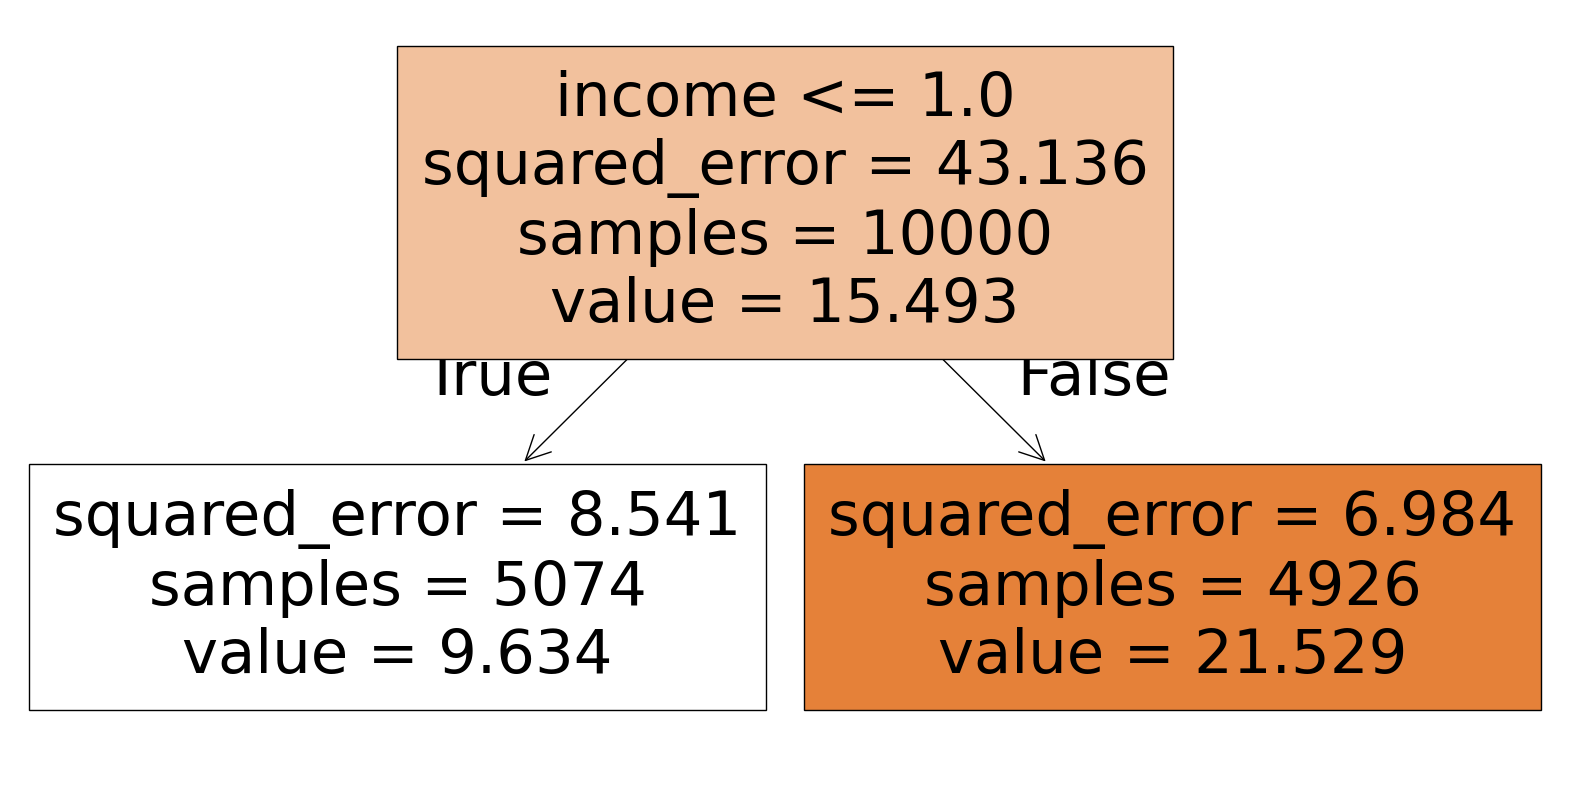

In [58]:
def show_tree(cp_val):
    reg_tree = DecisionTreeRegressor(ccp_alpha=cp_val)
    reg_tree.fit(reg_tree_data.drop(columns='demand'), reg_tree_data['demand'])

    plt.figure(figsize=(20,10))
    tree.plot_tree(reg_tree, filled=True, feature_names=reg_tree_data.drop(columns='demand').columns)
    plt.show()

pricing_df = og_df.copy()

reg_tree_data = pricing_df.drop(columns=['price', 'has_membership', 'is_us'])

show_tree(5)

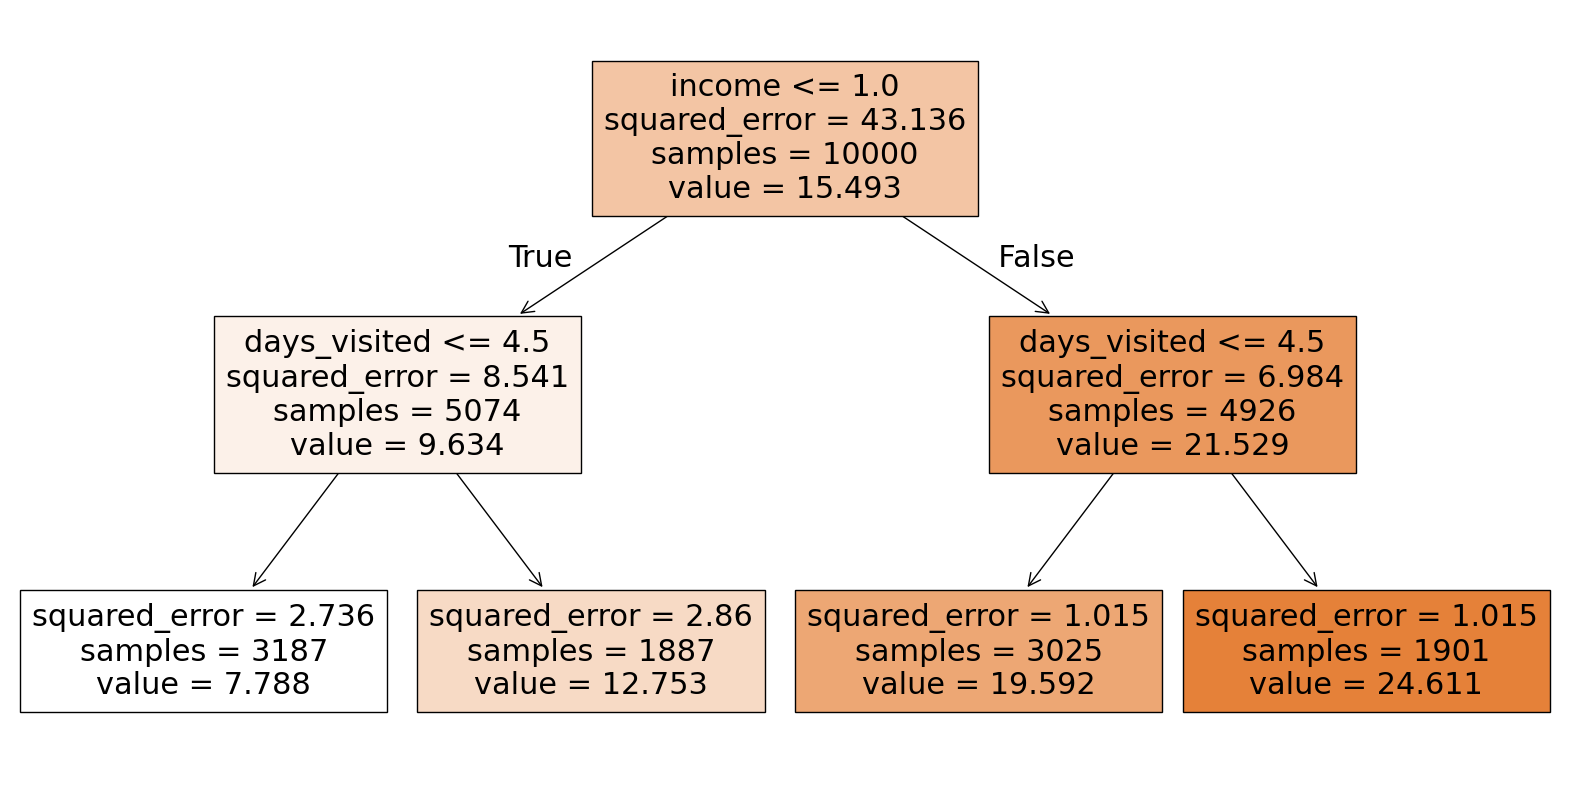

In [59]:
show_tree(1)

In [60]:
cp_val = 1
reg_tree = DecisionTreeRegressor(ccp_alpha=cp_val)
reg_tree.fit(reg_tree_data.drop(columns='demand'), reg_tree_data['demand'])

DecisionTreeRegressor(ccp_alpha=1)

In [61]:
pricing_df

,account_age,age,avg_hours,days_visited,friends_count,has_membership,is_us,songs_purchased,income,price,demand
0,3,53,1.834234,2,8,1,1,4.903237,0.960863,1.0,3.917117
1,5,54,7.171411,7,9,0,1,3.330161,0.732487,1.0,11.585706
2,3,33,5.351920,6,9,0,1,3.036203,1.130937,1.0,24.675960
3,2,34,6.723551,0,8,0,1,7.911926,0.929197,1.0,6.361776
4,4,30,2.448247,5,8,1,0,7.148967,0.533527,0.8,12.624123
...,...,...,...,...,...,...,...,...,...,...,...
9995,2,56,6.095439,3,10,0,0,7.406568,0.545599,0.8,9.447720
9996,3,52,7.828183,7,5,0,1,0.782374,0.944415,0.8,15.314092
9997,1,27,6.527350,6,9,0,1,10.926441,0.815953,1.0,11.263675
9998,4,49,2.803943,6,9,1,1,4.205016,0.504313,0.8,12.801971


In [64]:
pricing_df['leaf'] = reg_tree.apply(reg_tree_data.drop(columns='demand'))

# Elasticity function
def own_price_reg(leaf_num):
    df  = pricing_df[pricing_df['leaf'] == leaf_num]
    model = smf.ols('demand ~ price * has_membership * is_us', data=df).fit()
    return model.params['price']

elasticities = [own_price_reg(leaf) for leaf in pricing_df['leaf'].unique()]
print(elasticities)

[-18.265984327571324, -18.17187119271577, -5.235805786421214, -1.4067338547890245]
